#### 1. Read the csv file (USDA_Clean.csv) in the folder and assign it to a data frame.

In [1]:
import pandas as pd

df = pd.read_csv('USDA_Clean.csv')

#### 2. Check the datatypes of the attributes.

In [2]:
df.dtypes

,0
Unnamed: 0,int64
ID,int64
Description,object
Calories,int64
Protein,float64
TotalFat,float64
Carbohydrate,float64
Sodium,int64
Cholesterol,int64
Sugar,float64


#### 3. Create a scatterplot to illustrate the relationship between a food's TotalFat content and its Calorie content.

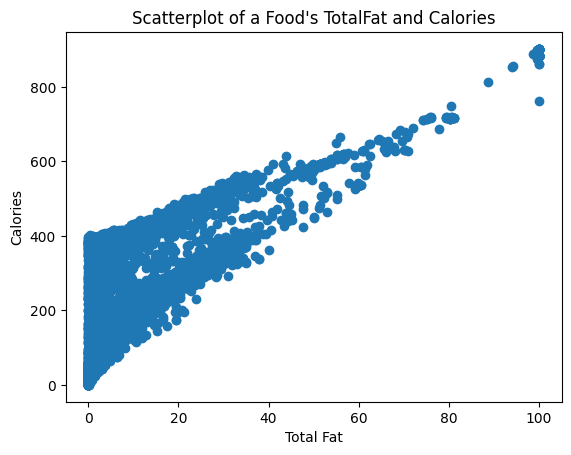

In [5]:
import matplotlib.pyplot as plt

plt.scatter(df['TotalFat'], df['Calories'])
plt.xlabel('Total Fat')
plt.ylabel('Calories')
plt.title("Scatterplot of a Food's TotalFat and Calories")
plt.show()

#### 4. Create a boxplot to illustrate the distribution of values for TotalFat, Protein and Carbohydrate.

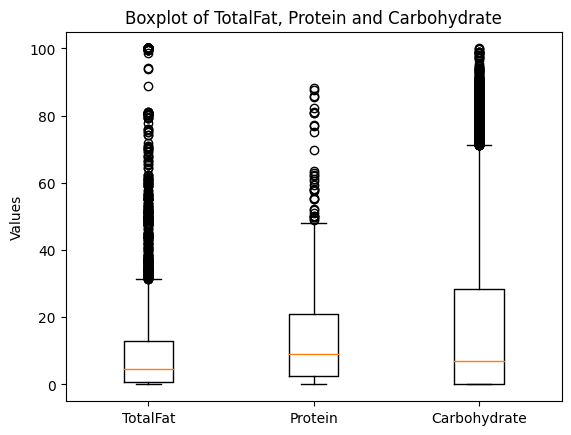

In [6]:
plt.boxplot([df['TotalFat'], df['Protein'], df['Carbohydrate']], labels=['TotalFat', 'Protein', 'Carbohydrate'])
plt.ylabel('Values')
plt.title('Boxplot of TotalFat, Protein and Carbohydrate')
plt.show()

#### 5. Visualize the correlation among Calories, Protein, Total Fat, Carbohydrate, Sodium and Cholesterol.

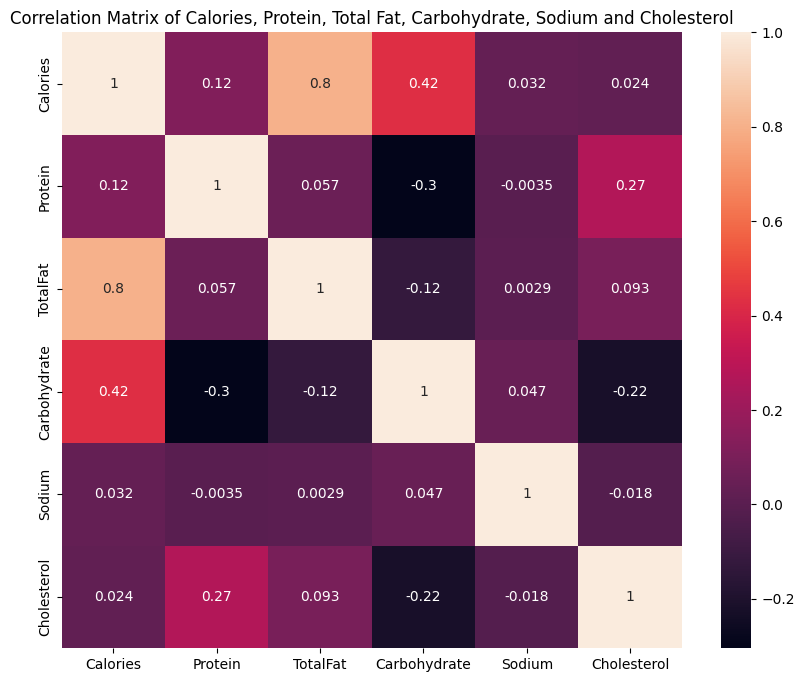

In [9]:
import seaborn as sns

corr_df = df[['Calories', 'Protein', 'TotalFat', 'Carbohydrate', 'Sodium', 'Cholesterol']]

corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix of Calories, Protein, Total Fat, Carbohydrate, Sodium and Cholesterol')
plt.show()

#### 6. Calculate the average amount of iron, for high and low protein foods.

In [17]:
median = df['Protein'].median()
high = df[df['Protein'] > median]
low = df[df['Protein'] <= median]

avg_high = high['Iron'].mean()
avg_low = low['Iron'].mean()

print("Average amount of iron for high and low protein foods:")
print(f"High: {avg_high}")
print(f"Low: {avg_low}")

Average amount of iron for high and low protein foods:
High: 3.4347606973058635
Low: 2.280472266244057


#### 7. Is the correlation between Calories and Total Fat statistically significant? Why?

In [19]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['Calories'], df['TotalFat'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

'''
# Interpretation
Since p_value < 0.05, the correlation between Calories and Total Fat is statistically significant.
'''

Pearson correlation coefficient: 0.8044950222574272
P-value: 0.0


'\n# Interpretation\nSince p_value < 0.05, the correlation between Calories and Total Fat is statistically significant.\n'

### 8. The population of all verbal GRE scores are known to have a standard deviation of 8.5. The  UW Psychology department hopes to receive applicants with a verbal GRE scores over 210.
### This year, the mean verbal GRE scores for the 42 applicants was 212.79. Using a value ofα = 0.05 is this new mean significantly greater than the desired mean of 210?

In [20]:
import numpy as np
from statsmodels.stats.weightstats import ztest

sample_mean = 212.79
population_mean = 210
population_std = 8.5
n = 42

np.random.seed(0)
sample_data = np.random.normal(sample_mean, population_std, n)

z_statistic, p_value = ztest(sample_data, value=population_mean, alternative='larger')

print(f"Z-statistic: {z_statistic}")
print(f"P-value: {p_value}")

Z-statistic: 3.3302146694214967
P-value: 0.00043389526255220253
